In [1]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import statsmodels.stats.power as pwr

from textwrap import wrap

In [2]:
f_title = {'fontsize': 15}

## Task 1: Applied regression

In [3]:
modechoice = sm.datasets.modechoice.load_pandas().data
modechoice.head()

,individual,mode,choice,ttme,invc,invt,gc,hinc,psize
0,1.0,1.0,0.0,69.0,59.0,100.0,70.0,35.0,1.0
1,1.0,2.0,0.0,34.0,31.0,372.0,71.0,35.0,1.0
2,1.0,3.0,0.0,35.0,25.0,417.0,70.0,35.0,1.0
3,1.0,4.0,1.0,0.0,10.0,180.0,30.0,35.0,1.0
4,2.0,1.0,0.0,64.0,58.0,68.0,68.0,30.0,2.0


### 1a) Using the data (ii)

In [5]:
modechoice.dtypes

individual    float64
mode          float64
choice        float64
ttme          float64
invc          float64
invt          float64
gc            float64
hinc          float64
psize         float64
dtype: object

Variables mode and choice seem categorical based on the data description, but they're encoded as numeric (float64).

In [6]:
# changing variables mode and choice to categorical
modechoice['mode'] = modechoice['mode'].astype("category")
modechoice['choice'] = modechoice['choice'].astype("category")

# testing to see whether mode and choice are now encoded as categorical - they are
'mode:', modechoice['mode'].dtypes, '\nchoice:', modechoice['choice'].dtypes


('mode:',
 CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0], ordered=False),
 '\nchoice:',
 CategoricalDtype(categories=[0.0, 1.0], ordered=False))

### 1b) Taking an initial look at the data

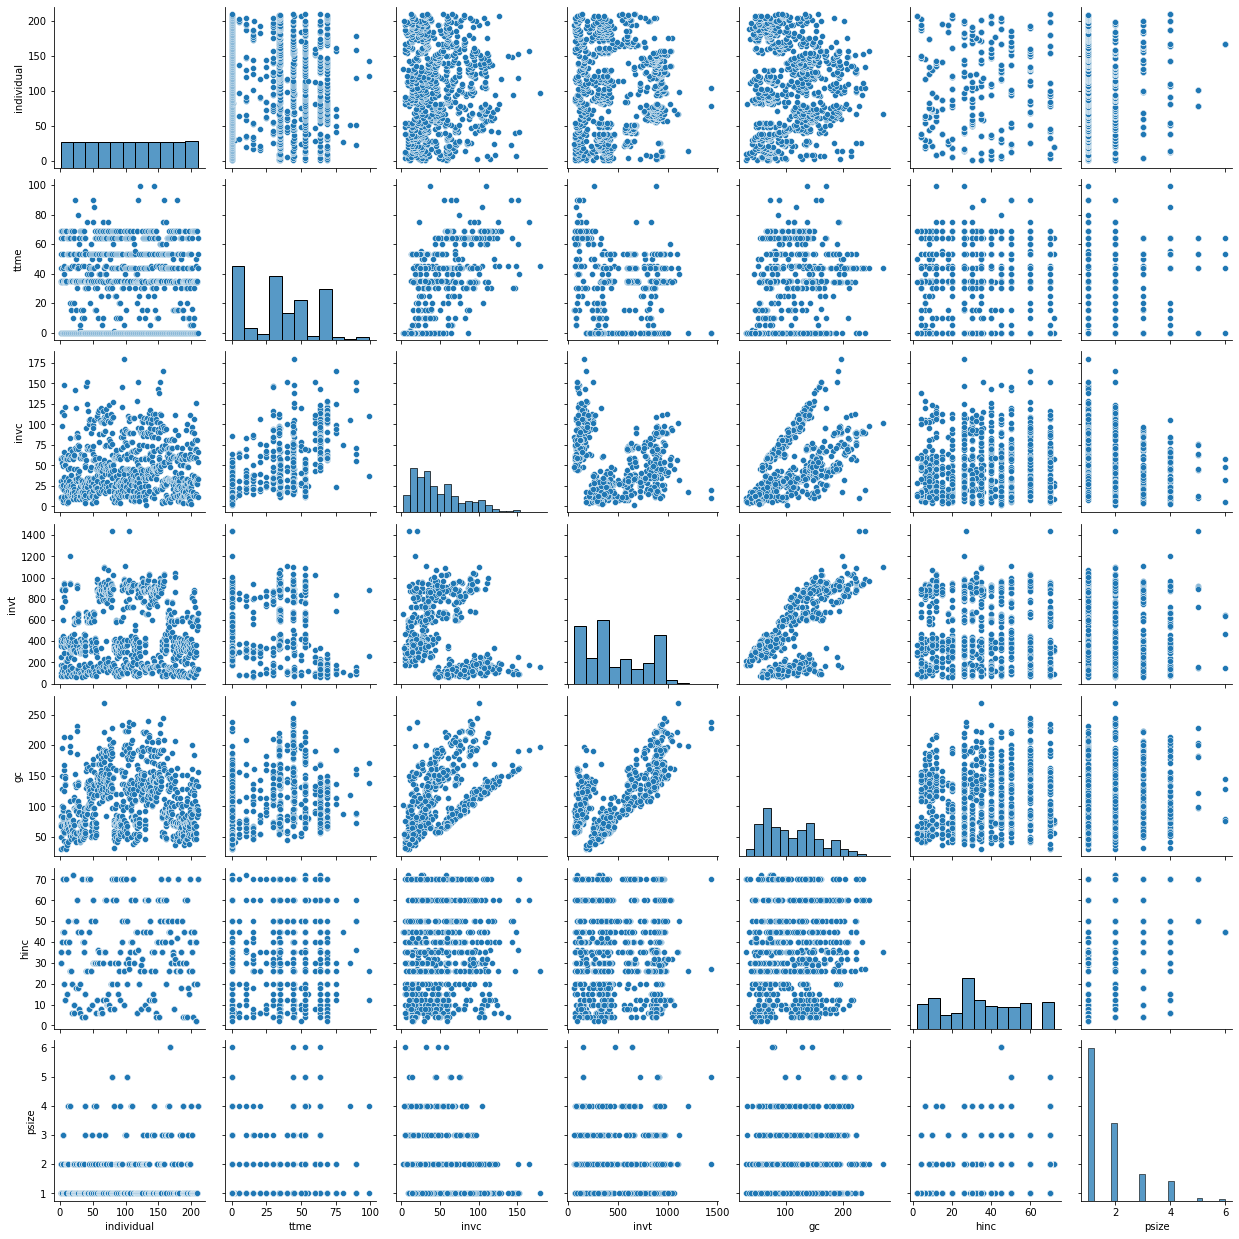

In [6]:
# pairplot, the categorical variables (mode, choice) are not included, this is correct based on sns documentation 
# (= categorical variables can be set as hues, but are not part of the pairplot itself)

sns.pairplot(modechoice)

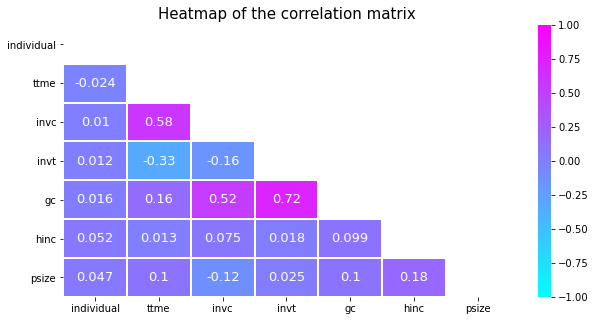

In [7]:
# calculating the correlation matrix
correl = modechoice.corr()

# specifying the mask to display just the lower half of the correlation matrix for better readability
mask = np.triu(np.ones_like(correl))
plt.figure(figsize=(10, 5))

# plotting the correlation matrix in a form of heatmap to make it easily readable
sns.heatmap(correl, mask=mask, vmin=-1, vmax=1, annot=True, cmap = 'cool', lw = 1, annot_kws={"size": 13})
plt.title('Heatmap of the correlation matrix', fontdict = f_title)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


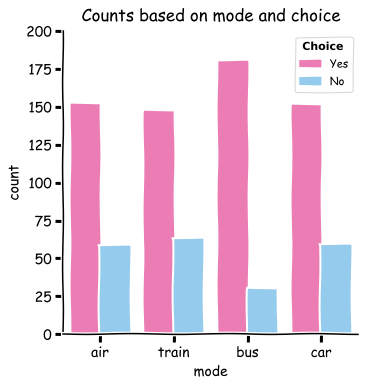

In [10]:
plt.xkcd(scale = 0.4)

# category plot
graph = sns.catplot(x="mode", hue="choice", data=modechoice, kind="count", palette = ('hotpink', 'lightskyblue'), legend = False)
graph.set_xticklabels(['air', 'train', 'bus', 'car'])

# making the graph pretty :)
plt.ylim(top = 200)
plt.legend(title = "$\\bf{Choice}$", labels=["Yes","No"], fontsize = 11, title_fontsize = 11)
plt.ylabel('count')
plt.xlabel('mode')
plt.title('Counts based on mode and choice', pad = 10)
plt.show()

### 1c) Evaluating models

In [13]:
fit_1 = smf.ols('ttme ~ invc', data = modechoice).fit()
fit_1.rsquared_adj

# quite low adjusted R^2, we believe we can do better

0.33605656554480123

In [14]:
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ttme   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     425.7
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           8.54e-77
Time:                        22:56:06   Log-Likelihood:                -3721.0
No. Observations:                 840   AIC:                             7446.
Df Residuals:                     838   BIC:                             7456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2255      1.251     10.575      0.000      10.771      15.680
invc           0.4473      0.022     20.632      0.000       0.405       0.490
==============================================================================
Omnibus:                      115.221   Durbin-Watson:                   2.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.186
Skew:                          -0.001   Prob(JB):                     4.60e-07
Kurtosis:                       2.087   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
fit_x = smf.ols('ttme ~ mode + choice -1', data = modechoice).fit()
fit_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ttme   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     963.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          4.46e-311
Time:                        22:57:04   Log-Likelihood:                -3168.8
No. Observations:                 840   AIC:                             6348.
Df Residuals:                     835   BIC:                             6371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
mode[1.0]        64.2059      0.765     83.918      0.000      62.704      65.708
mode[2.0]        39.1624      0.772     50.758      0.000      37.648      40.677
mode[3.0]        43.3104      0.738     58.665      0.000      41.861      44.759
mode[4.0]         3.2514      0.766      4.243      0.000       1.747       4.756
choice[T.1.0]   -11.5729      0.850    -13.619      0.000     -13.241      -9.905
==============================================================================
Omnibus:                      124.722   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1309.351
Skew:                           0.255   Prob(JB):                    4.77e-285
Kurtosis:                       9.095   Cond. No.                         1.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
fit_2 = smf.ols('ttme ~ mode*choice - 1', data = modechoice).fit()
fit_2.rsquared_adj

# acceptable adjusted R^2

0.8402078461130786

In [19]:
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ttme   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     631.2
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:58:18   Log-Likelihood:                -3119.8
No. Observations:                 840   AIC:                             6256.
Df Residuals:                     832   BIC:                             6293.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
mode[1.0]                    66.5329      0.809     82.250      0.000      64.945      68.121
mode[2.0]                    38.7619      0.823     47.124      0.000      37.147      40.376
mode[3.0]                    44.4000      0.743     59.730      0.000      42.941      45.859
mode[4.0]                 -1.726e-14      0.812  -2.13e-14      1.000      -1.593       1.593
choice[T.1.0]               -19.9984      1.539    -12.993      0.000     -23.020     -16.977
mode[T.2.0]:choice[T.1.0]     9.7603      2.150      4.539      0.000       5.539      13.981
mode[T.3.0]:choice[T.1.0]     0.7984      2.497      0.320      0.749      -4.104       5.700
mode[T.4.0]:choice[T.1.0]    19.9984      2.171      9.211      0.000      15.737      24.260
==============================================================================
Omnibus:                      251.907   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2494.393
Skew:                           1.062   Prob(JB):                         0.00
Kurtosis:                      11.171   Cond. No.                         6.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
fit_3 = smf.ols('ttme ~ mode*choice + invc', data = modechoice).fit()
fit_3.rsquared_adj

# even higher adjusted R^2

0.8415348622167619

In [10]:
sm.stats.anova_lm(fit_3, type = 1)

,df,sum_sq,mean_sq,F,PR(>F)
mode,3.0,408579.127381,136193.042460,1380.792965,2.865581e-322
choice,1.0,20654.984605,20654.984605,209.410532,1.712865e-42
mode:choice,3.0,10236.544072,3412.181357,34.594396,4.495788e-21
invc,1.0,785.848163,785.848163,7.967320,4.876704e-03
Residual,831.0,81964.799350,98.633934,NaN,NaN


In [18]:
fit_4 = smf.ols('ttme ~ mode*choice + invt', data = modechoice).fit()
fit_4.rsquared_adj

# still higher adjusted R^2

0.8416699514941333

In [19]:
# check whether including all the covariates/interactions is justified based on p-values (it is)
sm.stats.anova_lm(fit_4, type = 1)

,df,sum_sq,mean_sq,F,PR(>F)
mode,3.0,408579.127381,136193.042460,1381.971075,2.124482e-322
choice,1.0,20654.984605,20654.984605,209.589203,1.594376e-42
mode:choice,3.0,10236.544072,3412.181357,34.623912,4.323887e-21
invt,1.0,855.721990,855.721990,8.683138,3.301464e-03
Residual,831.0,81894.925524,98.549850,NaN,NaN


In [20]:
fit_5 = smf.ols('ttme ~ invt + invc + mode*choice', data = modechoice).fit()
fit_5.rsquared_adj

# highest adjusted R^2

0.8418407513517212

In [21]:
# again check whether including all the covariates/interactions is justified based on p-values (it isn't - invc high p-value)
sm.stats.anova_lm(fit_5, type = 1)

,df,sum_sq,mean_sq,F,PR(>F)
mode,3.0,408579.127381,136193.042460,1383.463498,2.371515e-322
choice,1.0,20654.984605,20654.984605,209.815544,1.473432e-42
mode:choice,3.0,10236.544072,3412.181357,34.661303,4.129072e-21
invt,1.0,855.721990,855.721990,8.692516,3.284808e-03
invc,1.0,186.788371,186.788371,1.897416,1.687391e-01
Residual,830.0,81708.137152,98.443539,NaN,NaN


In [22]:
# verify that the adjusted R^2 of fit_5 is the highest since the differences were so small and not easily readable
fit_3.rsquared_adj < fit_4.rsquared_adj < fit_5.rsquared_adj

True

Fit 5 ('ttme ~ invt + invc + mode * choice') has the highest adjusted R^2 however the difference between fit_5, fit_4 ('ttme ~ invt + mode * choice') and fit_3 ('ttme ~ invc + mode * choice') is only on the 4th decimal place so they fit almost equally well. Taking into consideration the F-test p-values from ANOVA table, we see that it is quite high for invc in the fit_5 model so we do not believe it is justified to include it in the model. Thus we believe the best suited model is <b> fit_4 ('ttme ~ invt + mode * choice') </b> where the usage of all the covariates is justified with extremely low F-test p-values and the adjusted R^2 is still very high at approximately 0.84.

### 1d) Making predictions (i)

In [23]:
results = smf.ols("ttme ~ mode + choice + invc + invt", data=modechoice).fit()
results.summary();

In [24]:
# using predict method to predict ttme based on our model and the out of sample data provided
tuple((results.predict(exog=dict(mode = [1, 2, 4], choice = [0, 0, 1], invc = [70, 20, 24], invt = [90, 500, 0])).round(2)))

(64.12, 38.96, -10.74)

The third value is not an accurate prediction, because from the data description we know that ttme is terminal waiting time, thus negative waiting time makes no sense. Additionally based on the data description we know that ttme for car (mode = 4) should be always 0. The other 2 predictions - waiting time of just over an hour for a plane (mode = 1) and almost 40 minutes for train (mode = 2) seem reasonable.

### 1e) Making predictions (ii)

1.

In [25]:
# predicted values for ttme based on data points from the modechoice data frame
ttme_predicted = results.predict()

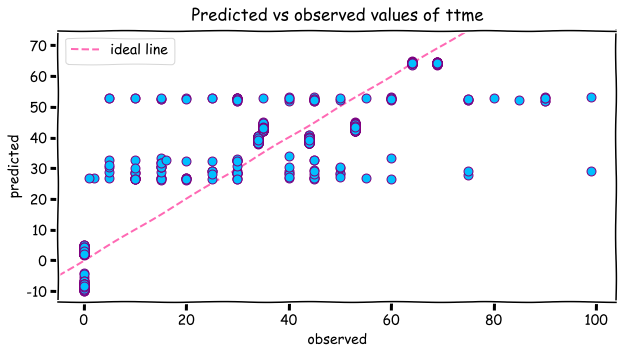

In [26]:
fig, ax = plt.subplots(figsize = (10, 5))

# plotting the predicted ttme values vs. observed ttme values
plt.scatter(x = modechoice['ttme'], y = ttme_predicted, color = 'deepskyblue', s = 80, edgecolors = 'purple', zorder = 2)

# plotting the ideal line that should be displayed if the model was perfect
ax.axline([0, 0], slope = 1, color = 'hotpink', lw = 2, zorder = 1, label = 'ideal line', linestyle = '--')

plt.ylim(top = max(ttme_predicted)+10)
plt.xlabel('observed')
plt.ylabel('predicted')
plt.legend(loc = 'upper left')
plt.title('Predicted vs observed values of ttme', pad = 10)
plt.show()

2. 
If the model was able to predict ttme perfectly, the plot would be a y = x line (the "ideal line" in the plot above) which would mean the predicted and observed values are the same.

### 1f) Missing covariates
   
   #### i)

In [26]:
# creating a new column where mode = 1 and mode = 2 is the same value (1.5)
modechoice['mode_2'] = np.where((modechoice['mode'] == 1.0) | (modechoice['mode'] == 2.0), 1.5, modechoice['mode'])

# checking that the new mode_2 column is correct and whether it is categorical (it is not)
modechoice.head();
modechoice.dtypes;

# changing the new mode_2 variable to categorical to match the original mode variable
modechoice['mode_2'] = modechoice['mode_2'].astype("category")
modechoice.dtypes;

# running the regression with the new model that doesn't distinguish between mode = 1 and mode = 2
results_2 = smf.ols("ttme ~ mode_2 + choice + invc + invt", data=modechoice).fit()
results_2.summary();

#### ii)

In [27]:
# creating 2 new columns where all values of choice and invc are the same (1)
modechoice['choice_2'], modechoice['invc_2'] = 1, 1

# checking that the new choice_2 and invc_2 columns are correct
modechoice.head();
modechoice.dtypes;

# changing the new choice_2 variable to categorical to match the original choice variable
modechoice['choice_2'] = modechoice['choice_2'].astype("category")
modechoice.dtypes;

# running the regression with the new model that does not distinguish between different values of choice and invc variables
results_2 = smf.ols("ttme ~ mode + choice_2 + invc_2 + invt", data=modechoice).fit()
results_2.summary();

## Task 2: Algorithms for regression

### 2a) Extract response and covariates from a formula

In [27]:
def extract(formula):
    ''' 
    This function extracts the response and the covariates out of a formula.

    Parameters
    ----------
        formula (str) : regression model formula 
    
    Returns
    -------
        (response, covariates) : tuple with response (str) and covariates (list)
    '''

    formula = formula.replace(" ", "") 
    response, covariates = formula.split("~")
    covariates = covariates.split("+")
    
    return (response, covariates)

In [29]:
# testing the extract function for different inputs
extract('y ~'), extract('y ~ x + z')

(('y', ['']), ('y', ['x', 'z']))

### 2b) Adding a covariate to a formula

In [29]:
def add_covariate(formula, covariate):
    '''
    This function adds a covariate to the formula.

    Parameters
    ----------
        formula (str) : regression model formula 
        covariate (str) : covariate we wish to add
    
    Returns
    -------
        formula (str) : regression model formula with added covariate, whitespaces included since that is the conventional form of the formula 
    '''

    response, covar = extract(formula)

    # if there are no covariates in the original formula, add the covariate without "+" in between (for correct syntax)
    if covar[0] == '':
        return formula + covariate
    
    # if there already are covariates in the formula, add "+" and the covariate
    else:
        return formula + ' + ' + covariate

In [30]:
# testing the add_covariate function
add_covariate('y ~ ', 'f'), add_covariate('y ~ x', 'f')

('y ~ f', 'y ~ x + f')

### 2c) Find all extensions of a model by one covariate

In [33]:
def extend_model(formula, covariate):
    ''' 
    This function finds all extensions of a model by one covariate from the list of covariates.

    Parameters
    ----------
        formula (str) : regression model formula 
        covariate (list) : list of covariates we want to extend the formula with
    
    Returns
    -------
        formulas (list) : list of all formulas that can be created by adding 1 covariate to the original formula without duplicate covariates
    '''

    response, covar = extract(formula)
    formulas = []

    # loop through covariates and ignore the ones that are already in the formula
    for c in covariate:
        if c not in formula:

            # if there are no covariates in the original formula, add the covariate without "+" in between
            if covar[0] == '':
                formulas.append(formula + c)
            
            # if there already are covariates in the formula, add "+" and the covariate
            else:
                formulas.append(formula + ' + ' + c)

    return formulas

In [34]:
# testing for both cases - at least one covariate is already in the formula, no covariate is in the formula yet
extend_model('y ~ x + z', ['x', 'v']), extend_model('y ~ x + z', ['s', 'r'])

(['y ~ x + z + v'], ['y ~ x + z + s', 'y ~ x + z + r'])

### 2d) Choosing the best covariate to add

In [31]:
def improve_model(formula, covariates, data):
    ''' 
    This function adds a single covariate out of a list of covariates to a formula based on which of the covariates 
    returns highest value of R^2 when the new formula is used in a regression.

    Parameters
    ----------
        formula (str) : regression model formula 
        covariates (list) : list of covariates that can be added to the formula
        data (df) : data we are running the regression on
    
    Returns
    -------
        formula (str) : new regression formula with the most suitable covariate added (highest R^2 among the possible formulas)
    '''
    
    # getting list of potential new formulas
    new_formulas = extend_model(formula, covariates)
    rsq = []

    # running the regression on all potentail formulas and making a list of their R^2
    for formula in new_formulas:
        rsq.append(smf.ols(formula, data = data).fit().rsquared)

    # finding the formula with highest R^2    
    index = np.argmax(rsq)
    return new_formulas[index]

In [35]:
# testing the improve modle function on example from task
formula = "ttme ~ mode + choice + invc"
covariates = ["hinc", "psize", "invt", "gc"]

improve_model(formula, covariates, modechoice)

'ttme ~ mode + choice + invc + psize'

### 2e) Select the $k<p$ most significant predictors (i)

In [36]:
def forward_k(formula, covariates, k, data):
    '''
    This recursive function iteratively adds the best predictor (out of list of possible covariates), according to R^2 value, 
    for k steps, and returns the formula of the best regression model.

    Parameters
    ----------
        formula (str) : regression model formula 
        covariates (list) : list of covariates that can be added to the formula
        k (int) : number of iterations (k - 1 covariates will be added)
        data (df) : data we are running the regression on
    
    Returns
    -------
        formula (str) : new formula extended by (k - 1) most suitable covariates 
    '''

    # defining base case
    if k == 0:
        return formula
    
    # raising an error when there are more iterations left than the covariates that can be added
    n = len(covariates)
    assert n >= k, "k must be smaller or equal to the number of covariates"

    # getting the best possible new formula
    formula = improve_model(formula, covariates, data)

    # recusively calling the function again for the new formula and 1 less iterations
    return forward_k(formula, covariates, k-1, data)

In [37]:
# testing the forward_k function for examples from the task
formula = "ttme ~ mode + choice + invc"
covariates = ["hinc", "psize", "invt", "gc"]

forward_k(formula, covariates, 2, modechoice)

'ttme ~ mode + choice + invc + psize + gc'

### 2f) Select the $k<p$ most significant predictors (ii)

In [38]:
def forward_k2(formula, max_formula, k, data):
    '''
    This recursive function iteratively adds the best predictor (from the fully extended formula), according to R^2 value, 
    for k steps, and returns the formula of the best regression model.

    Parameters
    ----------
        formula (str) : regression model formula 
        max_formula (str) : the fully extended regression formula (all possible covariates from the data are included)
        k (int) : number of iterations (k - 1 covariates will be added)
        data (df) : data we are running the regression on
    
    Returns
    -------
        formula (str) : new formula extended by (k - 1) most suitable covariates 
    '''

    # defining base case
    if k == 0:
        return formula
    
    # getting a list of covariates that can be possibly added
    response, covar = extract(formula)
    max_response, max_covar = extract(max_formula)
    covariates = set(max_covar) - set(covar)

    # raise error when there are more iterations left than the covariates that can be added
    n = len(covariates)
    assert n >= k, "k must be smaller or equal to the number of covariates"

    # getting the best possible new formula
    formula = improve_model(formula, covariates, data)

    # recusively calling the function again for the new formula and 1 less iterations
    return forward_k2(formula, max_formula, k-1, data)

In [39]:
# testing the forward_k2 function for examples from the task
formula = "ttme ~ mode + choice + invc"
max_formula = "ttme ~ mode + choice + invc + hinc + psize + invt + gc"
forward_k2(formula, max_formula, 2, modechoice)

'ttme ~ mode + choice + invc + psize + gc'

### 2g) Select covariates as long as the increment in $R^2$ is larger than $\delta$.

In [64]:
def forward_delta(formula, covariates, delta, data, old_rsq = 0):
    '''
    This recursive function iteratively adds the best predictor (from a list of possible covariates), according to R^2 value, 
    as long as the increase in R^2 is larger than assigned delta. It returns the formula of the best regression model obtained this way.

    Parameters
    ----------
        formula (str) : regression model formula 
        covariates (list) : list of covariates that can be added to the formula
        delta (int) : the minimum value by which the R^2 must increase between 2 iterations for the function to continue
        data (df) : data we are running the regression on
        old_rsq (float) : value of R^2 from the previous iteration, default value = 0 because the function starts with no previous R^2
    
    Returns
    -------
        R^2 (float) : R^2 obtained with the final (best) regression formula
        formula (str) : new formula extended by covariates that meet the set requirements
    '''

    # getting the best possible new formula and running regression with it to obtain R^2
    formula = improve_model(formula, covariates, data)
    rsq = smf.ols(formula, data = data).fit().rsquared

    # base case - halting the recursions once the increase in R^2 is lower than the set threshold delta
    if rsq - old_rsq <= delta:
        return (round(rsq, 3)), formula

    # recusively calling the function again for the new formula
    return forward_delta(formula, covariates, delta, data, rsq)

### 2h) Application

In [65]:
formula = "ttme ~ "
covariates = ["individual", "mode", "choice", "invc", "hinc", "psize", "invt", "gc", "choice * psize", "mode * choice"]
delta = 0.01

rsq, formula = forward_delta(formula, covariates, delta, modechoice)
print('Best formula: ' + formula + '\nIts R^2 = ' + str(round(rsq, 3)))


Best formula: ttme ~ mode * choice + choice * psize
Its R^2 = 0.849


According to our forward regression algorithm, the best suited model is 'ttme ~ mode * choice + choice * psize' and it gives R^2 of approximately 0.85. This is comparable to the R^2 we got with some of our models in 1c), even slightly better which supports the notion that this truly is one of the "best" models.

# Task 3: Simulations
### 3a) Find the *t*-test in statsmodels and apply it.

In [50]:
# import the nile data set
nile = sm.datasets.nile.load_pandas().data
nile.head();

In [51]:
# expected value in Null hypothesis (from stats.ttest_1samp documentation)
mu = 1000

# run two sided, one sample t-test and show its second output - the p-value
p_value = stats.ttest_1samp(nile.volume, mu)[1]
print('p-value =', p_value)

p-value = 6.46114014799341e-06


### 3b) Roll your own *t*-test function

In [75]:
def t_test(x, popmean):
    '''
    This function returns the p-value of a 1 sample, 2 tailed t-test.
    
    Parameters
    ----------
        x (numerical array) : sample we are testing
        popmean (int) : population mean we are testing for
    
    Returns
    -------
        p_value (float) : p-value
    '''
    
    # calculating all the necesary values
    n = len(x)
    sample_mean = np.mean(x)
    s = np.std(x, ddof = 1)
    
    # calculating t statistic
    t = np.sqrt(n)*(sample_mean - popmean)/s

    # using survival function (sf) instead of (1-cdf) as this should be more accuarte according to scipy documentation
    p_value = 2*(stats.t.sf(np.abs(t), df = n-1))

    return p_value

In [77]:
# testing our t_test function
t_test(nile.volume, mu)

6.461140147993352e-06

### 3c) The non-central *t*-distribution

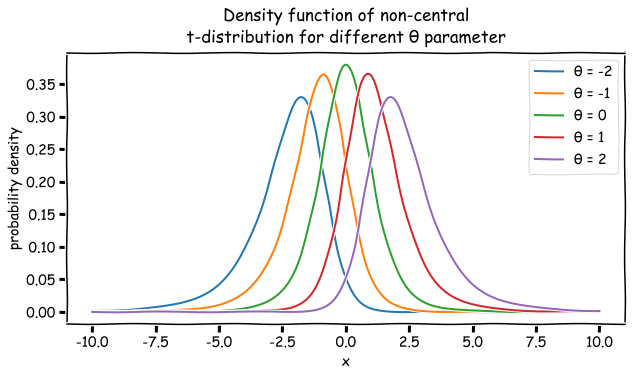

In [78]:
fig, ax = plt.subplots(figsize = (10, 5))

# creating the x-axis and assigning the theta values
x = np.linspace(-10, 10, 500)
thetas = [-2, -1, 0, 1, 2]

# plotting the density functions of non-central t-distribution for different theta values
for theta in thetas:
    plt.plot(x, stats.nct.pdf(x, 5, theta), label = 'θ = '+str(theta))

# making the plot pretty :)
plt.legend()
plt.title("\n".join(wrap('Density function of non-central t-distribution for different θ parameter', 40)), pad = 10)
plt.ylabel('probability density')
plt.xlabel('x')
plt.show()

### 3d) Power of the test (i)
1.

In [79]:
def power(mu, sigma, n, alpha = 0.05):
    '''
    This function calculates the power of the 1 sample t-test when the true distribution is normal.
    
    Parameters
    ----------
        mu (float) : population mean we are testing for
        sigma (float) : sample standard deviation 
        n (int) : number of observations (sample size)
        alpha (float) : cutoff for significantce (default = 0.05)
    
    Returns
    -------
        The exact power of the 1 sample t-test
    '''

    # calculating the right quantile of the t-distribution and the non central parameter
    t_alpha = stats.t.ppf(1 - alpha/2, df = n - 1)
    non_central_param = np.sqrt(n) * mu / sigma

    # calculating the cummulative distribution function (for non central t-distribution) at the cutoffs
    F1 = stats.nct.cdf(t_alpha, n - 1, non_central_param)
    F2 = stats.nct.cdf(-t_alpha, n - 1, non_central_param)

    return 1 - F1 + F2

2.

In [80]:
power(0.1, 2, 22)

0.05576730152298302

This means that the probability of rejecting a false null hypothesis is 0.056 which is very low. Meaning a lot of the times the test will be incorrect because it would indicate keeping a false null hypothesis.

In [50]:
# testing the power function
power(0, 1, 10), power(1, 1, 10)

(0.05000000000467565, 0.8030968422370941)

### 3e) Power of the test (ii)

In [11]:
def approx_power(mu, n, generator, n_reps, alpha = 0.05):
    '''
    This function calculates the approximate power of the 1 sample t-test when the true distribution is not normal.
    
    Parameters
    ----------
        mu (float) : population mean we are testing for
        n (int) : number of observations (sample size)
        generator (lambda function) : generator of a sample (n observations) from a specified distribution
        n_reps (int) : number of simulations
        alpha (float) : cutoff for significantce (default = 0.05)
    
    Returns
    -------
        The approximatated power of the 1 sample t-test
    '''

    # number of successful rejections (H0 was false and we rejected)
    success = 0

    # generating a sample of size n n_reps times
    for i in range(n_reps):
        x = generator(n)

        # calculating the p-value
        p_val = stats.ttest_1samp(x, mu)[1]

        # if p-value is less than alpha = we correctly reject H0 = success (false rejected)
        if p_val < alpha:
            success +=1
        
    # power = probability of success -> how many times we correctly rejected out of all n_reps simulations  
    power = success/n_reps

    return power

### 3f)  Power of the test (iii)

In [2]:
# generating the list of ns
ns = [3*(2*x -1) for x in range(1, 18)]

In [13]:
# assigning the generators for different distributions
generator_exp = lambda n: rng.exponential(1, n)
generator_uniform = lambda n: rng.uniform(size = n)
generator_laplace = lambda n: rng.laplace(0.1, 1, n)

power_exp, power_uniform, power_laplace = [], [], []

# calculating the power of the t-test for samples of size n with the true distribution being exponential, uniform and Laplace
for n in ns:
    rng = np.random.default_rng(seed = 313)
    power_exp.append(approx_power(0.3, n, generator_exp, 1000, alpha = 0.05))
    power_uniform.append(approx_power(0.7, n, generator_uniform, 1000, alpha = 0.05))
    power_laplace.append(approx_power(1, n, generator_laplace, 1000, alpha = 0.05))


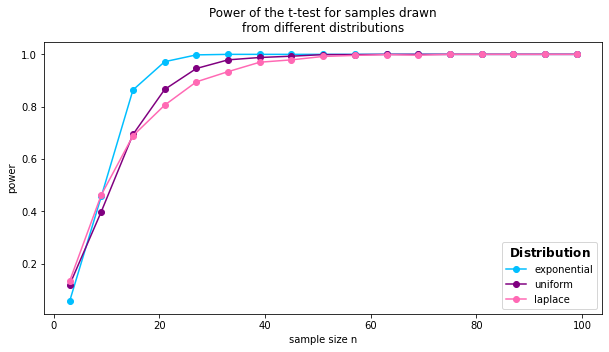

In [14]:
fig, ax = plt.subplots(figsize = (10, 5))

# plotting the different powers for different distributions in the same window
plt.plot(ns, power_exp, marker = "o", color = 'deepskyblue', label = 'exponential')
plt.plot(ns, power_uniform, marker = "o", color = 'purple', label = 'uniform')
plt.plot(ns, power_laplace, marker = "o", color = 'hotpink', label = 'laplace')

# making the graph pretty
plt.xlabel('sample size n')
plt.ylabel('power')
plt.title("\n".join(wrap('Power of the t-test for samples drawn from different distributions', 40)), pad = 10)
plt.legend(title = '$\\bf{Distribution}$', title_fontsize = 12, loc = 'lower right')
plt.show()

According to our research the t-test is invalid for small samples from non-normal distributions (n < 20) thus the power for these is low, this is shown on the graph above. However the t-test is valid and works quite well for big samples even from non-normal distributions (n > 20) so for these the power tends towards 1 (t-test works quite well) as we can see in the graph.

  
  .


In [88]:
# statistics meme to make Jonas happy :)
# relates to the last problems since power of a t-test = 1 - probability of Type II error

from IPython.display import Image
Image(url= "https://i.imgur.com/dtgMfDR.jpg")